# Read in Subset of data filtered by xgboost results

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import csv
import seaborn as sns

In [8]:
cpg_xgb = pd.read_csv('~/Desktop/297/cpgs_ordered_by_XGboost50.csv', delimiter = '\t', 
                      header = None, nrows=100000, low_memory=False)
cpg_xgb = np.array(cpg_xgb[0])

In [52]:
cpg_xgb
cpg_xgb = list(dict.fromkeys(cpg_xgb))
print(len(cpg_xgb))

2462


In [28]:
len(cpg_xgb)

2462

In [10]:
allcpgs = []
with open(r'./297/age_sample.txt') as f:
    for row in f:
        allcpgs.append(row[0:10])

In [11]:
allcpgs

['sample_id\t',
 'age\t71\t76\t',
 'tissue\tbra',
 'cg00050873',
 'cg00212031',
 'cg00213748',
 'cg00214611',
 'cg00455876',
 'cg01707559',
 'cg02004872',
 'cg02011394',
 'cg02050847',
 'cg02233190',
 'cg02494853',
 'cg02839557',
 'cg02842889',
 'cg03052502',
 'cg03155755',
 'cg03244189',
 'cg03443143',
 'cg03683899',
 'cg03695421',
 'cg03706273',
 'cg03750315',
 'cg03767353',
 'cg04016144',
 'cg04023335',
 'cg04042030',
 'cg04303809',
 'cg04448376',
 'cg04462340',
 'cg04689676',
 'cg04792227',
 'cg04840163',
 'cg04964672',
 'cg05213048',
 'cg05230942',
 'cg05480730',
 'cg05544622',
 'cg05621349',
 'cg05865243',
 'cg05890011',
 'cg06322277',
 'cg06479204',
 'cg07731488',
 'cg07747963',
 'cg07939587',
 'cg08242338',
 'cg08265308',
 'cg08921682',
 'cg09350919',
 'cg09460641',
 'cg09856092',
 'cg10076560',
 'cg10213302',
 'cg10252249',
 'cg10267609',
 'cg10363397',
 'cg10698069',
 'cg10841270',
 'cg11131351',
 'cg13268984',
 'cg13851368',
 'cg14180491',
 'cg14210405',
 'cg14466580',
 'cg1

In [37]:
# we want to skip the rows that are not in cpg_xgb
skipped = []
for i in range(3,len(allcpgs)):
    if allcpgs[i] not in cpg_xgb:
        skipped.append(i)

In [39]:
skipped[0:5]

[3, 4, 5, 6, 7]

In [49]:
print("Reading data...")
df_subset = pd.read_csv('./297/age_sample.txt', delimiter = '\t', header = None, 
                        skiprows=skipped, low_memory=False)

Reading data...


In [50]:
df_subset

,0,1,2,3,4,5,6,7,8,9,...,8365,8366,8367,8368,8369,8370,8371,8372,8373,8374
0,sample_id,GSM2139432,GSM2139249,GSM2139398,GSM2139297,GSM1069208,GSM1443489,GSM1069141,GSM1443483,GSM1069172,...,GSM1546403,GSM1546425,GSM1572948,GSM1573032,GSM1871586,GSM1871753,GSM1438255,GSM1438138,GSM1438147,GSM1438204
1,age,71,76,102,108,40,40,59,59,66,...,53,53,53,53,53,53,53.1594,53.3855,53.477,53.477
2,tissue,brain - superior temporal gyrus,brain - superior temporal gyrus,brain - superior temporal gyrus,brain - superior temporal gyrus,brain - superior temporal gyrus,brain - superior temporal gyrus,brain - superior temporal gyrus,brain - superior temporal gyrus,brain - superior temporal gyrus,...,brain - occipital lobe,brain - occipital lobe,brain - occipital lobe,brain - occipital lobe,brain - occipital lobe,brain - occipital lobe,brain - occipital lobe,brain - occipital lobe,brain - occipital lobe,brain - occipital lobe
3,cg00072288,0.025,0.423,0.4,0.433,0.024,0.024,0.036,0.036,0.013,...,0.02,0.239,0.02,0.239,0.02,0.239,0.495,0.009,0.029,0.028
4,cg00114625,0.047,0.531,0.563,0.538,0.018,0.018,0,0,0.01,...,0.001,0.623,0,0.623,0,0.623,0.571,0.012,0.012,0.007
5,cg00139317,0.03,0.525,0.472,0.475,0.008,0.008,0.011,0.011,0.025,...,0.023,0.517,0.023,0.517,0.023,0.517,0.496,0.023,0.016,0.013
6,cg00206414,0.403,0.339,0.393,0.436,0.482,0.482,0.308,0.308,0.515,...,0.361,0.268,0.361,0.267,0.361,0.267,0.396,0.536,0.49,0.579
7,cg00818649,0.011,0.143,0.167,0.16,0.009,0.009,0.003,0.003,0.003,...,0.002,0.32,0.002,0.32,0.002,0.32,0.236,0.017,0.007,0.006
8,cg00855706,0.744,0.744,0.727,0.727,0.76,0.76,0.752,0.752,0.759,...,0.676,0.655,0.677,0.655,0.677,0.655,0.638,0.687,0.625,0.627
9,cg00938641,0.801,0.813,0.799,0.833,0.808,0.808,0.74,0.74,0.776,...,0.894,0.912,0.894,0.912,0.894,0.912,0.817,0.886,0.898,0.896


In [53]:
# transpose to let cpg be columns
data = df_subset.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352
0,sample_id,age,tissue,cg00072288,cg00114625,cg00139317,cg00206414,cg00818649,cg00855706,cg00938641,...,cg04213163,cg04304494,cg04354805,cg04760426,cg05228408,cg05308819,cg05721773,cg05802244,cg05925577,cg06335143
1,GSM2139432,71,brain - superior temporal gyrus,0.025,0.047,0.03,0.403,0.011,0.744,0.801,...,0.754,0.025,0.035,0.905,0.146,0.124,0.243,0.932,0.783,0.165
2,GSM2139249,76,brain - superior temporal gyrus,0.423,0.531,0.525,0.339,0.143,0.744,0.813,...,0.734,0.021,0.05,0.927,0.134,0.14,0.257,0.934,0.783,0.139
3,GSM2139398,102,brain - superior temporal gyrus,0.4,0.563,0.472,0.393,0.167,0.727,0.799,...,0.739,0.019,0.041,0.892,0.11,0.136,0.224,0.931,0.78,0.103
4,GSM2139297,108,brain - superior temporal gyrus,0.433,0.538,0.475,0.436,0.16,0.727,0.833,...,0.757,0.022,0.046,0.916,0.18,0.19,0.283,0.932,0.781,0.155


In [55]:
data.columns = data.iloc[0]
data = data[1:]
data.head()

,sample_id,age,tissue,cg00072288,cg00114625,cg00139317,cg00206414,cg00818649,cg00855706,cg00938641,...,cg04213163,cg04304494,cg04354805,cg04760426,cg05228408,cg05308819,cg05721773,cg05802244,cg05925577,cg06335143
1,GSM2139432,71,brain - superior temporal gyrus,0.025,0.047,0.03,0.403,0.011,0.744,0.801,...,0.754,0.025,0.035,0.905,0.146,0.124,0.243,0.932,0.783,0.165
2,GSM2139249,76,brain - superior temporal gyrus,0.423,0.531,0.525,0.339,0.143,0.744,0.813,...,0.734,0.021,0.05,0.927,0.134,0.14,0.257,0.934,0.783,0.139
3,GSM2139398,102,brain - superior temporal gyrus,0.4,0.563,0.472,0.393,0.167,0.727,0.799,...,0.739,0.019,0.041,0.892,0.11,0.136,0.224,0.931,0.78,0.103
4,GSM2139297,108,brain - superior temporal gyrus,0.433,0.538,0.475,0.436,0.16,0.727,0.833,...,0.757,0.022,0.046,0.916,0.18,0.19,0.283,0.932,0.781,0.155
5,GSM1069208,40,brain - superior temporal gyrus,0.024,0.018,0.008,0.482,0.009,0.76,0.808,...,0.753,0.024,0.064,0.948,0.141,0.17,0.295,0.944,0.824,0.075


# Different tissues

Text(0, 0.5, 'number of samples')

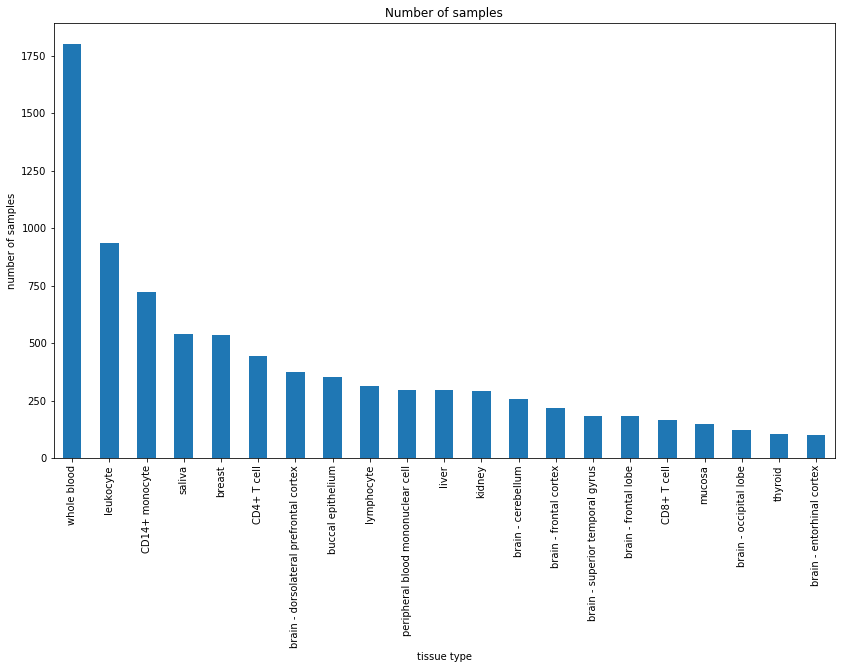

In [57]:
ax = data['tissue'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of samples")
ax.set_xlabel("tissue type")
ax.set_ylabel("number of samples")

In [64]:
data['tissue'].value_counts()

whole blood                               1802
leukocyte                                  934
CD14+ monocyte                             724
saliva                                     539
breast                                     535
CD4+ T cell                                443
brain - dorsolateral prefrontal cortex     373
buccal epithelium                          351
lymphocyte                                 313
peripheral blood mononuclear cell          294
liver                                      294
kidney                                     290
brain - cerebellum                         257
brain - frontal cortex                     219
brain - superior temporal gyrus            182
brain - frontal lobe                       182
CD8+ T cell                                164
mucosa                                     149
brain - occipital lobe                     124
thyroid                                    105
brain - entorhinal cortex                  100
Name: tissue,

# Whole blood

In [230]:
# getting just the blood data
blood_df = data[data['tissue'].str.contains("whole blood")]
blood_df.head()

,sample_id,age,tissue,cg00072288,cg00114625,cg00139317,cg00206414,cg00818649,cg00855706,cg00938641,...,cg04213163,cg04304494,cg04354805,cg04760426,cg05228408,cg05308819,cg05721773,cg05802244,cg05925577,cg06335143
5318,GSM2334366,94,whole blood,0.415,0.641,0.561,0.449,0.265,0.809,0.894,...,0.497,0.024,0.05,0.942,0.442,0.509,0.49,0.941,0.803,0.279
5319,GSM989882,96,whole blood,0.018,0.007,0.034,0.458,0.006,0.678,0.883,...,0.454,0.026,0.058,0.94,0.365,0.487,0.465,0.959,0.825,0.352
5320,GSM989863,101,whole blood,0.318,0.594,0.533,0.201,0.319,0.694,0.903,...,0.422,0.026,0.045,0.886,0.348,0.459,0.412,0.956,0.776,0.273
5321,GSM1443696,99,whole blood,0.018,0.009,0.018,0.033,0.002,0.741,0.939,...,0.504,0.021,0.049,0.949,0.346,0.437,0.429,0.959,0.778,0.269
5322,GSM1069241,99,whole blood,0.018,0.009,0.018,0.033,0.002,0.741,0.939,...,0.504,0.021,0.049,0.949,0.346,0.437,0.429,0.959,0.778,0.269


In [231]:
blood_df.shape

(1802, 1353)

In [103]:
blood_df = blood_df.reset_index(drop=True)
blood_df = blood_df.dropna(axis='columns')

In [104]:
blood_df.head()

,sample_id,age,tissue,cg00124011,cg00172330,cg00576014,cg00832850,cg00959118,cg00992913,cg01071314,...,cg03335216,cg03696327,cg03700143,cg04213163,cg04304494,cg04760426,cg05228408,cg05308819,cg05721773,cg06335143
0,GSM2334366,94,whole blood,0.021,0.013,0.016,0.029,0.183,0.013,0.996,...,0.196,0.041,0.922,0.497,0.024,0.942,0.442,0.509,0.49,0.279
1,GSM989882,96,whole blood,0.032,0.009,0.016,0.02,0.122,0.023,0.958,...,0.165,0.047,0.935,0.454,0.026,0.94,0.365,0.487,0.465,0.352
2,GSM989863,101,whole blood,0.015,0.014,0.01,0.021,0.161,0.019,0.969,...,0.138,0.062,0.916,0.422,0.026,0.886,0.348,0.459,0.412,0.273
3,GSM1443696,99,whole blood,0.017,0.015,0.016,0.024,0.164,0.029,0.978,...,0.136,0.053,0.872,0.504,0.021,0.949,0.346,0.437,0.429,0.269
4,GSM1069241,99,whole blood,0.017,0.015,0.016,0.024,0.164,0.029,0.978,...,0.136,0.053,0.872,0.504,0.021,0.949,0.346,0.437,0.429,0.269


(array([228., 212., 221., 227., 218., 237., 221., 205.,  30.,   3.]),
 array([  0. ,  11.2,  22.4,  33.6,  44.8,  56. ,  67.2,  78.4,  89.6,
        100.8, 112. ]),
 <a list of 10 Patch objects>)

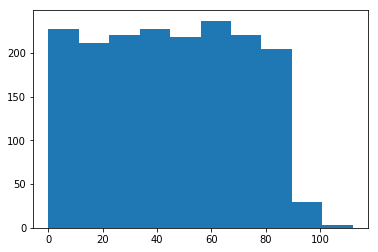

In [105]:
counts, bins = np.histogram(blood_df['age'].astype(float).astype(int))
plt.hist(bins[:-1], bins, weights=counts)

In [106]:
X = blood_df.iloc[:, 3:].to_numpy()
Y = blood_df[['age']].astype(float).astype(int)

In [107]:
X.shape

(1802, 752)

In [108]:
Y.shape

(1802, 1)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state = 4, shuffle=True)

In [110]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

In [150]:
def BuildModel():
    model = Sequential()
    model.add(Dense(50, input_dim=X.shape[1],activation='sigmoid')) 
#    model.add(Dense(128, activation='relu')) 
    model.add(Dense(16,activation='relu')) 
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")   
    return model

In [152]:
regressor = KerasRegressor(build_fn=BuildModel,epochs=50,batch_size=5)
regressor.fit(X_train,Y_train) 

y_pred = regressor.predict(X_test)

Epoch 1/50
1441/1441 [==============================] - 1s 896us/step - loss: 1414.7521
Epoch 2/50
1441/1441 [==============================] - 1s 380us/step - loss: 682.3554
Epoch 3/50
1441/1441 [==============================] - 1s 390us/step - loss: 667.0382
Epoch 4/50
1441/1441 [==============================] - 1s 364us/step - loss: 565.0103
Epoch 5/50
1441/1441 [==============================] - 1s 357us/step - loss: 303.7444
Epoch 6/50
1441/1441 [==============================] - 1s 361us/step - loss: 110.5293
Epoch 7/50
1441/1441 [==============================] - 1s 388us/step - loss: 75.1878
Epoch 8/50
1441/1441 [==============================] - 1s 356us/step - loss: 55.2034
Epoch 9/50
1441/1441 [==============================] - 1s 357us/step - loss: 48.1578
Epoch 10/50
1441/1441 [==============================] - 1s 355us/step - loss: 44.3307
Epoch 11/50
1441/1441 [==============================] - 1s 358us/step - loss: 39.8030
Epoch 12/50
1441/1441 [======================

In [153]:
mse_krr = mean_squared_error(Y_test, y_pred)
print("MSE is", mse_krr)
print("rMSE is", np.sqrt(mse_krr))

MSE is 23.010737496397446
rMSE is 4.796950854073601


In [154]:
Y_test = Y_test.reset_index(drop=True)

In [155]:
Y_comparison = pd.DataFrame()
Y_comparison['pred'] = y_pred
Y_comparison['true'] = Y_test

[Text(0.5, 1.0, 'Predicted age vs true age (test set)')]

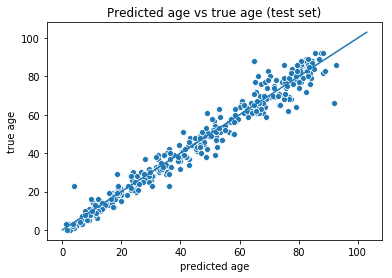

In [159]:
line = pd.DataFrame()
line['predicted age'] = [i for i in range(104)]
line['true age'] = [i for i in range(104)]
sns.scatterplot(data=Y_comparison, x="pred", y="true")
sns.lineplot(data=line, x="predicted age", y="true age").set(title='Predicted age vs true age (test set)')

# Impute missing values for blood

In [232]:
# order by age
blood_df = data[data['tissue'].str.contains("whole blood")]
blood_df.head()

,sample_id,age,tissue,cg00072288,cg00114625,cg00139317,cg00206414,cg00818649,cg00855706,cg00938641,...,cg04213163,cg04304494,cg04354805,cg04760426,cg05228408,cg05308819,cg05721773,cg05802244,cg05925577,cg06335143
5318,GSM2334366,94,whole blood,0.415,0.641,0.561,0.449,0.265,0.809,0.894,...,0.497,0.024,0.05,0.942,0.442,0.509,0.49,0.941,0.803,0.279
5319,GSM989882,96,whole blood,0.018,0.007,0.034,0.458,0.006,0.678,0.883,...,0.454,0.026,0.058,0.94,0.365,0.487,0.465,0.959,0.825,0.352
5320,GSM989863,101,whole blood,0.318,0.594,0.533,0.201,0.319,0.694,0.903,...,0.422,0.026,0.045,0.886,0.348,0.459,0.412,0.956,0.776,0.273
5321,GSM1443696,99,whole blood,0.018,0.009,0.018,0.033,0.002,0.741,0.939,...,0.504,0.021,0.049,0.949,0.346,0.437,0.429,0.959,0.778,0.269
5322,GSM1069241,99,whole blood,0.018,0.009,0.018,0.033,0.002,0.741,0.939,...,0.504,0.021,0.049,0.949,0.346,0.437,0.429,0.959,0.778,0.269


In [235]:
blood_df = blood_df.sort_values(by='age').reset_index(drop=True)
blood_df.head()

,sample_id,age,tissue,cg00072288,cg00114625,cg00139317,cg00206414,cg00818649,cg00855706,cg00938641,...,cg04213163,cg04304494,cg04354805,cg04760426,cg05228408,cg05308819,cg05721773,cg05802244,cg05925577,cg06335143
0,GSM2187500,0,whole blood,0.379,0.566,0.554,0.06,0.225,0.695,0.868,...,0.636,0.032,0.253,0.875,0.683,0.806,0.737,0.891,0.821,0.056
1,GSM2190369,0,whole blood,0.024,0.012,0.012,0.04,0.012,0.713,0.929,...,0.696,0.042,0.218,0.876,0.746,0.804,0.744,0.897,0.772,0.107
2,GSM2125683,0,whole blood,0.417,0.609,0.497,0.1,0.362,0.768,0.908,...,0.667,0.026,0.273,0.824,0.746,0.854,0.77,0.893,0.854,0.071
3,GSM1646885,0,whole blood,0.017,0.015,0.016,0.025,0.008,0.815,0.911,...,0.617,0.038,0.2,0.905,0.639,0.786,0.744,0.944,0.828,0.094
4,GSM2187483,0,whole blood,0.019,0.012,0.025,0.202,0.013,0.744,0.874,...,0.695,0.024,0.25,0.827,0.649,0.741,0.725,0.917,0.806,0.127


In [244]:
type(blood_df.loc[0, 'cg00072288'])

str

In [247]:
blood_df.iloc[:,3:] = blood_df.iloc[:,3:].astype(float)

In [250]:
for col_ind in range(3,len(blood_df.columns)):
    if col_ind % 100 == 0:
        print("Now at col", col_ind)
    col = blood_df.columns[col_ind]
    for index, row in blood_df.iterrows():
        if row[col] is np.nan:
            if index <= 1:
                blood_df.loc[index, col] = np.nansum(blood_df.loc[index+1, col] + blood_df.loc[index+2, col])/2
            elif index >= len(blood_df)-2:
                blood_df.loc[index, col] = np.nansum(blood_df.loc[index-2, col] + blood_df.loc[index-1, col])/2
            else:
                blood_df.loc[index, col] = np.nansum(blood_df.loc[index-1, col] + blood_df.loc[index+1, col])/2


Now at col 100
Now at col 200
Now at col 300
Now at col 400
Now at col 500
Now at col 600
Now at col 700
Now at col 800
Now at col 900
Now at col 1000
Now at col 1100
Now at col 1200
Now at col 1300


In [256]:
blood_df.shape

(1802, 1353)

In [257]:
blood_df.reset_index(drop=True)
blood_df = blood_df.dropna(axis='columns')

In [258]:
blood_df.shape

(1802, 755)

In [251]:
X = blood_df.iloc[:, 3:].to_numpy()
Y = blood_df[['age']].astype(float).astype(int)

In [252]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state = 4, shuffle=True)

In [253]:
def BuildModel():
    model = Sequential()
    model.add(Dense(50, input_dim=X.shape[1],activation='sigmoid')) 
#    model.add(Dense(128, activation='relu')) 
    model.add(Dense(16,activation='relu')) 
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")   
    return model

In [254]:
regressor = KerasRegressor(build_fn=BuildModel,epochs=50,batch_size=5)
regressor.fit(X_train,Y_train) 

y_pred = regressor.predict(X_test)

Epoch 1/50
1441/1441 [==============================] - 2s 1ms/step - loss: nan
Epoch 2/50
1441/1441 [==============================] - 1s 495us/step - loss: nan
Epoch 3/50
1441/1441 [==============================] - 1s 490us/step - loss: nan
Epoch 4/50
1441/1441 [==============================] - 1s 493us/step - loss: nan
Epoch 5/50
1441/1441 [==============================] - 1s 490us/step - loss: nan
Epoch 6/50
1441/1441 [==============================] - 1s 488us/step - loss: nan
Epoch 7/50
1441/1441 [==============================] - 1s 487us/step - loss: nan
Epoch 8/50
1441/1441 [==============================] - 1s 490us/step - loss: nan
Epoch 9/50
1441/1441 [==============================] - 1s 493us/step - loss: nan
Epoch 10/50
1441/1441 [==============================] - 1s 459us/step - loss: nan
Epoch 11/50
1441/1441 [==============================] - 1s 414us/step - loss: nan
Epoch 12/50
1441/1441 [==============================] - 1s 417us/step - loss: nan
Epoch 13/50
144

In [255]:
mse_krr = mean_squared_error(Y_test, y_pred)
print("MSE is", mse_krr)
print("rMSE is", np.sqrt(mse_krr))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
Y_comparison = pd.DataFrame()
Y_comparison['pred'] = y_pred
Y_comparison['true'] = Y_test

In [ ]:
line = pd.DataFrame()
line['predicted age'] = [i for i in range(104)]
line['true age'] = [i for i in range(104)]
sns.scatterplot(data=Y_comparison, x="pred", y="true")
sns.lineplot(data=line, x="predicted age", y="true age").set(title='Predicted age vs true age (test set)')

# Leukocyte

In [161]:
# getting just the blood data
leukocyte_df = data[data['tissue'].str.contains("leukocyte")]
leukocyte_df.head()

,sample_id,age,tissue,cg00072288,cg00114625,cg00139317,cg00206414,cg00818649,cg00855706,cg00938641,...,cg04213163,cg04304494,cg04354805,cg04760426,cg05228408,cg05308819,cg05721773,cg05802244,cg05925577,cg06335143
2690,GSM1051760,22,leukocyte,0.329,0.564,0.505,0.089,0.227,0.738,0.88,...,0.489,0.023,0.068,0.914,0.405,0.549,0.479,0.97,0.765,0.155
2691,GSM1051604,24,leukocyte,0.424,0.554,0.511,0.242,0.162,0.692,0.915,...,0.505,0.029,0.075,0.946,0.432,0.619,0.539,0.952,0.793,0.129
2692,GSM1051622,25,leukocyte,0.018,0.006,0.032,0.054,0.016,0.811,0.91,...,0.511,0.03,0.053,0.913,0.351,0.534,0.477,0.95,0.712,0.151
2693,GSM1051742,26,leukocyte,0.468,0.568,0.539,0.264,0.226,0.713,0.908,...,0.475,0.02,0.06,0.937,0.429,0.574,0.511,0.965,0.813,0.139
2694,GSM2075306,79,leukocyte,0.026,0.008,0.015,0.009,0.002,0.726,0.817,...,0.532,0.034,0.008,0.908,0.241,0.456,0.311,0.912,0.886,0.261


In [162]:
leukocyte_df = leukocyte_df.reset_index(drop=True)
leukocyte_df = leukocyte_df.dropna(axis='columns')
leukocyte_df.head()

,sample_id,age,tissue,cg00072288,cg00114625,cg00818649,cg03906572,cg06124711,cg15322230,cg15806723,...,cg03664992,cg03696327,cg04304494,cg04354805,cg04760426,cg05308819,cg05721773,cg05802244,cg05925577,cg06335143
0,GSM1051760,22,leukocyte,0.329,0.564,0.227,0.451,0.403,0.524,0.342,...,0.11,0.045,0.023,0.068,0.914,0.549,0.479,0.97,0.765,0.155
1,GSM1051604,24,leukocyte,0.424,0.554,0.162,0.412,0.45,0.56,0.36,...,0.075,0.04,0.029,0.075,0.946,0.619,0.539,0.952,0.793,0.129
2,GSM1051622,25,leukocyte,0.018,0.006,0.016,0.033,0.008,0.823,0.005,...,0.086,0.032,0.03,0.053,0.913,0.534,0.477,0.95,0.712,0.151
3,GSM1051742,26,leukocyte,0.468,0.568,0.226,0.405,0.428,0.527,0.297,...,0.094,0.037,0.02,0.06,0.937,0.574,0.511,0.965,0.813,0.139
4,GSM2075306,79,leukocyte,0.026,0.008,0.002,0.008,0.013,0.759,0.009,...,0.105,0.07,0.034,0.008,0.908,0.456,0.311,0.912,0.886,0.261


In [163]:
leukocyte_df.shape

(934, 445)

(array([113.,   0.,   6.,  25., 110., 165., 180., 155., 166.,  14.]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <a list of 10 Patch objects>)

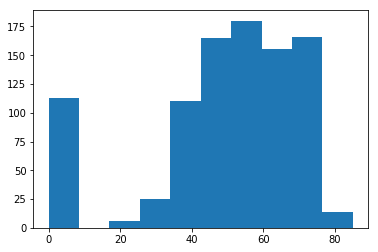

In [164]:
counts, bins = np.histogram(leukocyte_df['age'].astype(float).astype(int))
plt.hist(bins[:-1], bins, weights=counts)

In [170]:
X = leukocyte_df.iloc[:, 3:].to_numpy()
Y = leukocyte_df[['age']].astype(float).astype(int)

In [171]:
X.shape

(934, 442)

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state = 4, shuffle=True)

In [180]:
def BuildModel():
    model = Sequential()
    model.add(Dense(50, input_dim=X.shape[1],activation='relu')) 
#    model.add(Dense(128, activation='relu')) 
    model.add(Dense(16,activation='relu')) 
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")   
    return model

In [181]:
regressor = KerasRegressor(build_fn=BuildModel,epochs=50,batch_size=5)
regressor.fit(X_train,Y_train) 

y_pred = regressor.predict(X_test)

Epoch 1/50
653/653 [==============================] - 1s 2ms/step - loss: 956.5051
Epoch 2/50
653/653 [==============================] - 0s 364us/step - loss: 418.7968
Epoch 3/50
653/653 [==============================] - 0s 357us/step - loss: 388.6596
Epoch 4/50
653/653 [==============================] - 0s 343us/step - loss: 362.5297
Epoch 5/50
653/653 [==============================] - 0s 342us/step - loss: 323.4439
Epoch 6/50
653/653 [==============================] - 0s 364us/step - loss: 277.2284
Epoch 7/50
653/653 [==============================] - 0s 336us/step - loss: 221.9693
Epoch 8/50
653/653 [==============================] - 0s 377us/step - loss: 167.1182
Epoch 9/50
653/653 [==============================] - 0s 345us/step - loss: 124.3352
Epoch 10/50
653/653 [==============================] - 0s 394us/step - loss: 96.4655
Epoch 11/50
653/653 [==============================] - 0s 349us/step - loss: 81.8669
Epoch 12/50
653/653 [==============================] - 0s 343us/ste

In [182]:
mse_krr = mean_squared_error(Y_test, y_pred)
print("MSE is", mse_krr)
print("rMSE is", np.sqrt(mse_krr))

MSE is 20.942499594149638
rMSE is 4.57629758583832


In [183]:
Y_test = Y_test.reset_index(drop=True)

In [184]:
Y_comparison = pd.DataFrame()
Y_comparison['pred'] = y_pred
Y_comparison['true'] = Y_test

[Text(0.5, 1.0, 'Leukocyte Predicted age vs true age (test set)')]

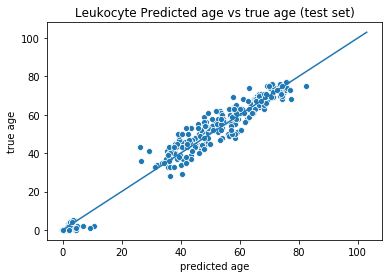

In [185]:
line = pd.DataFrame()
line['predicted age'] = [i for i in range(104)]
line['true age'] = [i for i in range(104)]
sns.scatterplot(data=Y_comparison, x="pred", y="true")
sns.lineplot(data=line, x="predicted age", y="true age").set(title='Leukocyte Predicted age vs true age (test set)')

# Brain

In [187]:
# getting just the blood data
brain_df = data[data['tissue'].str.contains("brain")]
brain_df.head()

,sample_id,age,tissue,cg00072288,cg00114625,cg00139317,cg00206414,cg00818649,cg00855706,cg00938641,...,cg04213163,cg04304494,cg04354805,cg04760426,cg05228408,cg05308819,cg05721773,cg05802244,cg05925577,cg06335143
1,GSM2139432,71,brain - superior temporal gyrus,0.025,0.047,0.03,0.403,0.011,0.744,0.801,...,0.754,0.025,0.035,0.905,0.146,0.124,0.243,0.932,0.783,0.165
2,GSM2139249,76,brain - superior temporal gyrus,0.423,0.531,0.525,0.339,0.143,0.744,0.813,...,0.734,0.021,0.05,0.927,0.134,0.14,0.257,0.934,0.783,0.139
3,GSM2139398,102,brain - superior temporal gyrus,0.4,0.563,0.472,0.393,0.167,0.727,0.799,...,0.739,0.019,0.041,0.892,0.11,0.136,0.224,0.931,0.78,0.103
4,GSM2139297,108,brain - superior temporal gyrus,0.433,0.538,0.475,0.436,0.16,0.727,0.833,...,0.757,0.022,0.046,0.916,0.18,0.19,0.283,0.932,0.781,0.155
5,GSM1069208,40,brain - superior temporal gyrus,0.024,0.018,0.008,0.482,0.009,0.76,0.808,...,0.753,0.024,0.064,0.948,0.141,0.17,0.295,0.944,0.824,0.075


In [188]:
brain_df.shape

(1437, 1353)

In [189]:
brain_df = brain_df.reset_index(drop=True)
brain_df = brain_df.dropna(axis='columns')
brain_df.head()

,sample_id,age,tissue,cg00124011,cg00172330,cg00576014,cg00832850,cg00992913,cg04101015,cg04140924,...,cg03700143,cg04213163,cg04304494,cg04354805,cg04760426,cg05228408,cg05308819,cg05721773,cg05802244,cg06335143
0,GSM2139432,71,brain - superior temporal gyrus,0.02,0.016,0.01,0.026,0.023,0.77,0.009,...,0.85,0.754,0.025,0.035,0.905,0.146,0.124,0.243,0.932,0.165
1,GSM2139249,76,brain - superior temporal gyrus,0.017,0.012,0.013,0.029,0.021,0.771,0.006,...,0.852,0.734,0.021,0.05,0.927,0.134,0.14,0.257,0.934,0.139
2,GSM2139398,102,brain - superior temporal gyrus,0.018,0.011,0.014,0.022,0.024,0.719,0.007,...,0.807,0.739,0.019,0.041,0.892,0.11,0.136,0.224,0.931,0.103
3,GSM2139297,108,brain - superior temporal gyrus,0.017,0.011,0.016,0.024,0.024,0.719,0.009,...,0.833,0.757,0.022,0.046,0.916,0.18,0.19,0.283,0.932,0.155
4,GSM1069208,40,brain - superior temporal gyrus,0.022,0.012,0.011,0.029,0.02,0.716,0.007,...,0.768,0.753,0.024,0.064,0.948,0.141,0.17,0.295,0.944,0.075


(array([ 54., 119., 101., 165., 195., 175., 151., 347.,  97.,  33.]),
 array([  0. ,  11.4,  22.8,  34.2,  45.6,  57. ,  68.4,  79.8,  91.2,
        102.6, 114. ]),
 <a list of 10 Patch objects>)

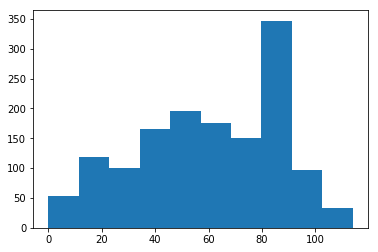

In [190]:
counts, bins = np.histogram(brain_df['age'].astype(float).astype(int))
plt.hist(bins[:-1], bins, weights=counts)

In [191]:
X = brain_df.iloc[:, 3:].to_numpy()
Y = brain_df[['age']].astype(float).astype(int)

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state = 4, shuffle=True)

In [199]:
def BuildModel():
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1],activation='relu')) 
#    model.add(Dense(128, activation='relu')) 
    model.add(Dense(16,activation='relu')) 
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")   
    return model

In [200]:
regressor = KerasRegressor(build_fn=BuildModel,epochs=50,batch_size=5)
regressor.fit(X_train,Y_train) 

y_pred = regressor.predict(X_test)

Epoch 1/50
1005/1005 [==============================] - 1s 1ms/step - loss: 1377.7649
Epoch 2/50
1005/1005 [==============================] - 0s 378us/step - loss: 705.5637
Epoch 3/50
1005/1005 [==============================] - 0s 387us/step - loss: 646.5370
Epoch 4/50
1005/1005 [==============================] - 0s 386us/step - loss: 576.5443
Epoch 5/50
1005/1005 [==============================] - 0s 328us/step - loss: 483.0231
Epoch 6/50
1005/1005 [==============================] - 0s 394us/step - loss: 367.8929
Epoch 7/50
1005/1005 [==============================] - 0s 406us/step - loss: 244.5144
Epoch 8/50
1005/1005 [==============================] - 0s 440us/step - loss: 150.7557
Epoch 9/50
1005/1005 [==============================] - 0s 442us/step - loss: 121.0112
Epoch 10/50
1005/1005 [==============================] - 0s 391us/step - loss: 112.6535
Epoch 11/50
1005/1005 [==============================] - 0s 419us/step - loss: 106.3825
Epoch 12/50
1005/1005 [===================

In [201]:
mse_krr = mean_squared_error(Y_test, y_pred)
print("MSE is", mse_krr)
print("rMSE is", np.sqrt(mse_krr))

MSE is 72.6861589448582
rMSE is 8.525617804291851


In [202]:
Y_test = Y_test.reset_index(drop=True)

In [203]:
Y_comparison = pd.DataFrame()
Y_comparison['pred'] = y_pred
Y_comparison['true'] = Y_test

[Text(0.5, 1.0, 'Leukocyte Predicted age vs true age (test set)')]

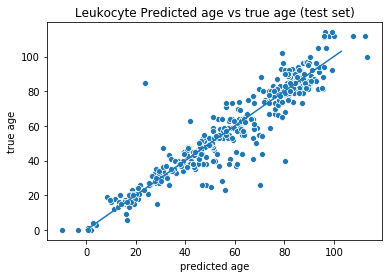

In [204]:
line = pd.DataFrame()
line['predicted age'] = [i for i in range(104)]
line['true age'] = [i for i in range(104)]
sns.scatterplot(data=Y_comparison, x="pred", y="true")
sns.lineplot(data=line, x="predicted age", y="true age").set(title='Leukocyte Predicted age vs true age (test set)')

# Overlap across different tissues within the brain?

In [205]:
brain_df = data[data['tissue'].str.contains("brain")]
brain_df.head()

,sample_id,age,tissue,cg00072288,cg00114625,cg00139317,cg00206414,cg00818649,cg00855706,cg00938641,...,cg04213163,cg04304494,cg04354805,cg04760426,cg05228408,cg05308819,cg05721773,cg05802244,cg05925577,cg06335143
1,GSM2139432,71,brain - superior temporal gyrus,0.025,0.047,0.03,0.403,0.011,0.744,0.801,...,0.754,0.025,0.035,0.905,0.146,0.124,0.243,0.932,0.783,0.165
2,GSM2139249,76,brain - superior temporal gyrus,0.423,0.531,0.525,0.339,0.143,0.744,0.813,...,0.734,0.021,0.05,0.927,0.134,0.14,0.257,0.934,0.783,0.139
3,GSM2139398,102,brain - superior temporal gyrus,0.4,0.563,0.472,0.393,0.167,0.727,0.799,...,0.739,0.019,0.041,0.892,0.11,0.136,0.224,0.931,0.78,0.103
4,GSM2139297,108,brain - superior temporal gyrus,0.433,0.538,0.475,0.436,0.16,0.727,0.833,...,0.757,0.022,0.046,0.916,0.18,0.19,0.283,0.932,0.781,0.155
5,GSM1069208,40,brain - superior temporal gyrus,0.024,0.018,0.008,0.482,0.009,0.76,0.808,...,0.753,0.024,0.064,0.948,0.141,0.17,0.295,0.944,0.824,0.075


In [210]:
brain_subtissues = brain_df['tissue'].unique()
brain_subtissues

array(['brain - superior temporal gyrus', 'brain - cerebellum',
       'brain - dorsolateral prefrontal cortex',
       'brain - entorhinal cortex', 'brain - frontal cortex',
       'brain - frontal lobe', 'brain - occipital lobe'], dtype=object)

In [ ]:
brain_cpgs = []
for brain_subtissues

In [213]:
cerebellum_cpg = brain_df[brain_df['tissue'] == 'brain - cerebellum'].dropna(axis='columns').columns[3:]

In [226]:
cerebellum_cpg = np.array(cerebellum_cpg)
len(cerebellum_cpg)

1052

In [215]:
prefrontal_cpg = brain_df[brain_df['tissue'] == 'brain - dorsolateral prefrontal cortex'].dropna(axis='columns').columns[3:]

In [227]:
prefrontal_cpg = np.array(prefrontal_cpg)
len(prefrontal_cpg)

560

In [217]:
def intersection(lst1, lst2): 
    lst3 = [list(filter(lambda x: x in lst1, sublist)) for sublist in lst2] 
    return lst3 

In [224]:
overlap = 0
for c in prefrontal_cpg:
    if c in cerebellum_cpg:
        overlap += 1

In [225]:
overlap

438